# The Central Limit Theorem in practice

Given a random variable $X$, then it happens that $X \sim N(\mu, \sigma)$, which also implies:
$$
    \frac{X}{a} \sim N\left(\frac{\mu}{a} , \frac{\sigma}{a}\right)
$$
Also remembering that the expected value of $X$ is $p$ and the standard error of $X$ is $\sqrt{p(1-p)/N}$:
$$
\begin{align*}
    E(\bar{X}) & = p \\
    SE(\bar{X}) & = \sqrt{p(1-p)/N}
\end{align*}
$$

In [62]:
using Distributions
using Random
using StatsBase
using StatsPlots
using Plots

In [14]:
X̂ = 0.48
N = 25
se = sqrt(X̂ * (1-X̂) / N)
println("se: ", se)

se: 0.09991996797437437


In [17]:
pnorm(x::Number) = cdf(Normal(0, 1), x)
pnorm(0.01/se) - pnorm(-0.01/se)

0.0797192630235779

# Margin of Error

In [15]:
2*se

0.19983993594874874

In [16]:
pnorm(2) - pnorm(-2)

0.9544997361036416

# Monte Carlo simulation for CLT

In [22]:
p = 0.45
N = 1000
x = sample([0, 1], Weights([p, 1-p]), N)
x̂ = mean(x)

0.569

## Monte Carlo simulation using a set value of p

This is done by repeating $B$ times the last `sample` method and return it as a vector in order to plot it correctly.

In [56]:
B = 10000
N = 1000

function getX̂(p::Float64, N::Int, B::Int)::Vector{Float64}
    x = sample([0, 1], Weights([p, 1-p]), (N, B))
    return mean(x, dims=1) |> vec
end

x̂ = getX̂(p, N, 10000);

## Histogram and QQ-plot of Monte Carlo results

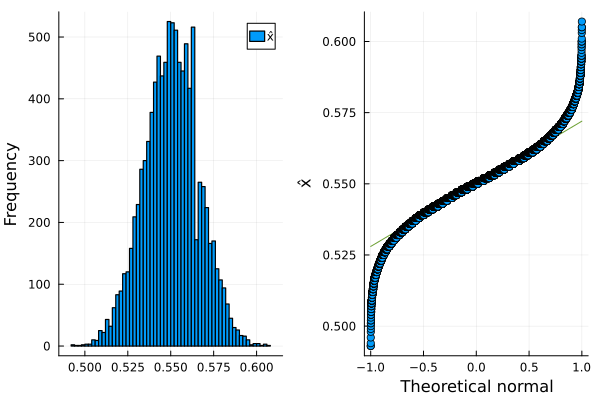

In [55]:
plotHistogram = histogram(x̂, bins=:auto, linecolor="black", linewidth=1.2,
                          label="x̂", ylabel="Frequency")
plotQQ = qqplot(-1:1/B:1, x̂, qqline=:R, label="", ylabel="x̂", xlabel="Theoretical normal")
plot(plotHistogram, plotQQ, layout=(1, 2))

# The Spread

Some key points:
- The spread between two outcomes with probabilities $p$ and $1 - p$ is $2p - 1$.
- The expected value of the spread is $2\bar{X} - 1$.
- The standard error of the spread is $2\hat{SE}\left( \bar{X} \right)$.
- The margin error of the spread is 2 times the margin of the error of $\bar{X}$.

# Bias: Why Not Run a Very Large Poll?

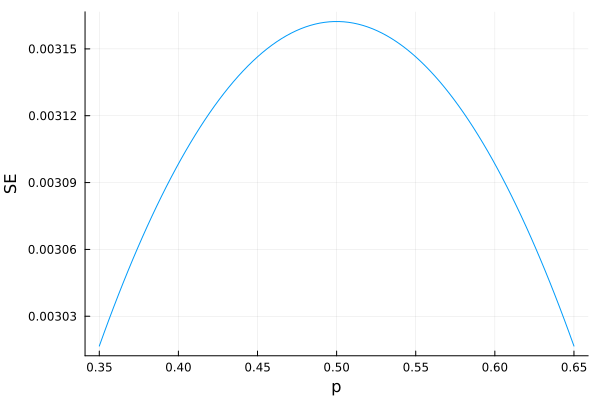

In [63]:
N = 100000
p = range(0.35, 0.65, 100)
se = map(x -> 2 * sqrt(x * (1-x) / N), p)
plot(p, se, xlabel="p", ylabel="SE", label="", line=:solid)